In [44]:
import os
import matplotlib.pyplot as plt
import seaborn as sn

import cv2
from random import randint

import numpy as np

Images are already divided into train and test  data. Each class in train set contains `100-120` images, in test set - `20' images.
* Classes list which contains the names of 9 classes of activities based on folders names;


dynamicimages9
----> dynamicimages9:	 2 folders, 0 imgs
test
------> test:	 9 folders, 0 imgs
ApplyLipstick
--------> ApplyLipstick:	 0 folders, 20 imgs
BasketballDunk
--------> BasketballDunk:	 0 folders, 20 imgs
BaseballPitch
--------> BaseballPitch:	 0 folders, 20 imgs
ApplyEyeMakeup
--------> ApplyEyeMakeup:	 0 folders, 20 imgs
BalanceBeam
--------> BalanceBeam:	 0 folders, 20 imgs
Archery
--------> Archery:	 0 folders, 20 imgs
BandMarching
--------> BandMarching:	 0 folders, 20 imgs
BabyCrawling
--------> BabyCrawling:	 0 folders, 20 imgs
Basketball
--------> Basketball:	 0 folders, 20 imgs
train
------> train:	 9 folders, 20 imgs
ApplyLipstick
--------> ApplyLipstick:	 0 folders, 94 imgs
BasketballDunk
--------> BasketballDunk:	 0 folders, 111 imgs
BaseballPitch
--------> BaseballPitch:	 0 folders, 130 imgs
ApplyEyeMakeup
--------> ApplyEyeMakeup:	 0 folders, 125 imgs
BalanceBeam
--------> BalanceBeam:	 0 folders, 88 imgs
Archery
--------> Archery:	 0 folders, 125 imgs
BandMarchi

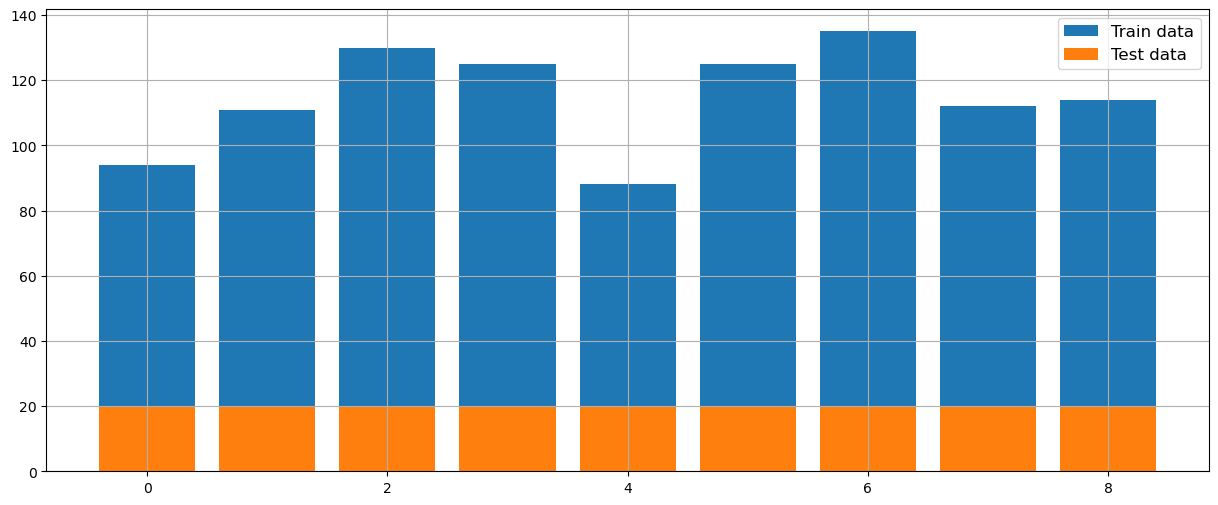

In [49]:
CLASSES, images = [], [] # names of classes, count of images for each class

for root, dirs, files in os.walk('/kaggle/input/dynamicimages9'):
    f = os.path.basename(root)    # get class name 
    
    print(f)
#     print(len(files))
    if len(files) > 0:
        images.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f) # add folder name
   
    
    
    # uncomment this block if you want a text output about each subfolder
    count_dirs = 0
    for f in dirs:           # count subfolders
        count_dirs += 1
    depth = root.split(os.sep)
    print((len(depth) - 2) * '--'+'>', '{}:\t {} folders, {} imgs'.format(os.path.basename(root), count_dirs, images[-1] if images!=[] else 0)) 
    
class_count = len(CLASSES) # 9 = number of classes
print('{} classes with {} images in total'.format(len(CLASSES), sum(images)))

f, ax = plt.subplots(figsize=(15,6))
if(images[0])<30:
    plt.bar(range(class_count), images[class_count:], label = 'Train data')
    plt.bar(range(class_count), images[0:class_count], label = 'Test data')
else:
    plt.bar(range(class_count), images[0:class_count], label = 'Train data')
    plt.bar(range(class_count), images[class_count:], label = 'Test data')
ax.grid()
ax.legend(fontsize = 12);

In [48]:
print(CLASSES)

['ApplyLipstick', 'BasketballDunk', 'BaseballPitch', 'ApplyEyeMakeup', 'BalanceBeam', 'Archery', 'BandMarching', 'BabyCrawling', 'Basketball']


Orange small bars represent test data and blue bars represent train data. Data is normally distributed.

Preparing training data

Preparing parameters

* resizing processed images to `img_w, img_h` - this option we will be using when cropping images and as a parameter of neural network; 
* providing the train directory path.

In [50]:
img_w, img_h = 220, 220    # width and height of image
train_dir = '/kaggle/input/dynamicimages9/train/'

Function which will read images and class names
* this function will be also used with test images;
* read each image from disk using `cv2` and resize it to `img_w*1.5, img_h*1.5`;
* set `cv2.COLOR_BGR2RGB` option because opencv reads and displays an image as BGR color format instead of RGB color format. Without this option images will be shown in blue hue because `matplotlib` uses RGB to display image;
* create a list of class names while reading folders - `Archery, Basketball, etc`;
* when `Images` list is ready - convert it to Numpy array;
* return tuple of 2 elements: Images and corresponding Labels.

In [52]:
def read_imgs_lbls(_dir):
    Images, Labels = [], []
    for root, dirs, files in os.walk(_dir):
        f = os.path.basename(root)  # get class name       
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)              # read the image (OpenCV)
                image = cv2.resize(image,(int(img_w*1.5), int(img_h*1.5)))       # resize the image (images are different sizes)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images, Labels)

In [53]:
print("hello")

hello


In [54]:
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(CLASSES):    # foreach CLASSES
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels

In [55]:
Train_Imgs, Train_Lbls = read_imgs_lbls(train_dir)
Train_Lbls = get_class_index(Train_Lbls)
print('Shape of train images: {}'.format(Train_Imgs.shape))
print('Shape of train labels: {}'.format(Train_Lbls.shape))

Shape of train images: (1034, 330, 330, 3)
Shape of train labels: (1034,)


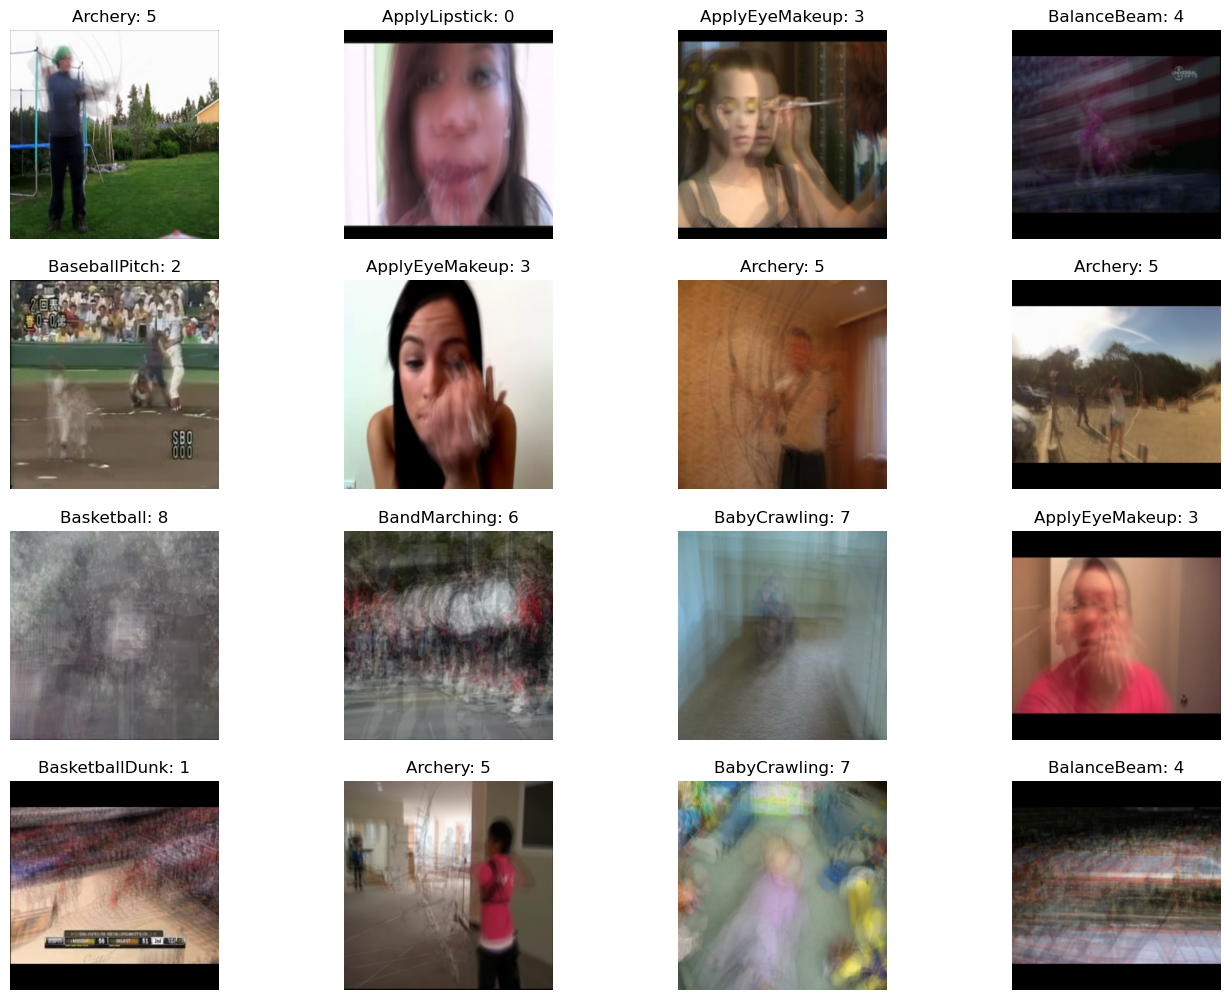

In [57]:
dim = 4 #you can change it;  4x4 dimension flat plot

f,ax = plt.subplots(dim,dim) 
f.subplots_adjust(0,0,2,2)
for i in range(0,dim):
    for j in range(0,dim):
        rnd_number = randint(0,len(Train_Imgs))
        cl = Train_Lbls[rnd_number]
        ax[i,j].imshow(Train_Imgs[rnd_number])
        ax[i,j].set_title(CLASSES[cl]+': ' + str(cl))
        ax[i,j].axis('off')

In [58]:
def edge_and_cut(img):
    try:
        edges = cv2.Canny(img, img_w, img_h)            
        
        if(np.count_nonzero(edges)>edges.size/10000):           
            pts = np.argwhere(edges>0)
            y1,x1 = pts.min(axis=0)
            y2,x2 = pts.max(axis=0)
            
            new_img = img[y1:y2, x1:x2]           # crop the region
            new_img = cv2.resize(new_img,(img_w, img_h))  # Convert back
        else:
            new_img = cv2.resize(img,(img_w, img_h))
    
    except Exception as e:
        print(e)
        new_img = cv2.resize(img,(img_w, img_h))
    
    return new_img

In [59]:
def show_cropped(img):
    emb_img = img.copy()
    edges = cv2.Canny(img, img_w, img_h)
    
    if(np.count_nonzero(edges)>edges.size/10000):
        pts = np.argwhere(edges>0)
        y1,x1 = pts.min(axis=0)
        y2,x2 = pts.max(axis=0)

        new_img = img[y1:y2, x1:x2]  

        edge_size = 1             

        emb_img[y1-edge_size:y1+edge_size, x1:x2] = [255, 0, 0]
        emb_img[y2-edge_size:y2+edge_size, x1:x2] = [255, 0, 0]
        emb_img[y1:y2, x1-edge_size:x1+edge_size] = [255, 0, 0]
        emb_img[y1:y2, x2-edge_size:x2+edge_size] = [255, 0, 0]

        new_img = cv2.resize(new_img,(img_w, img_h))  
    else:
        new_img = cv2.resize(img,(img_w, img_h))
    
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image', fontsize=14)
    ax[1].imshow(edges, cmap='gray')
    ax[1].set_title('Canny Edges', fontsize=14)
    ax[2].imshow(emb_img, cmap='gray')
    ax[2].set_title('Bounding Box', fontsize=14)       
    ax[3].imshow(new_img, cmap='gray')
    ax[3].set_title('Cropped', fontsize=14)   

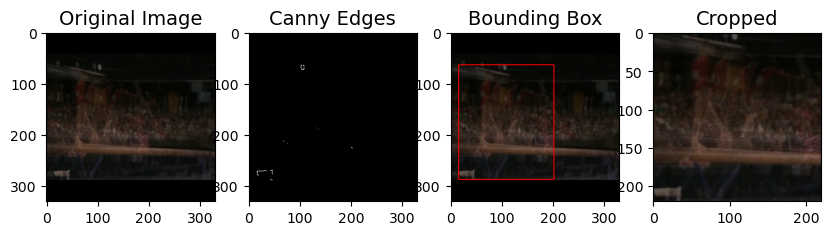

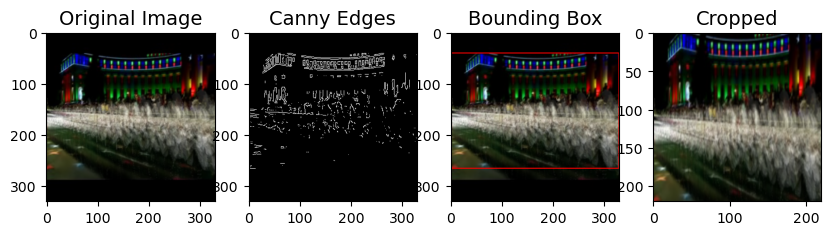

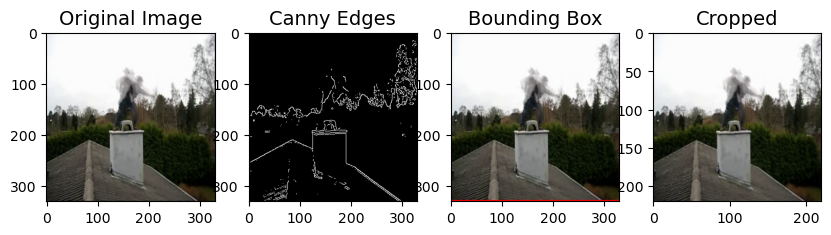

In [60]:
for x in range(0,3):
    show_cropped(Train_Imgs[randint(0,len(Train_Imgs))])

In [61]:
def crop_images(Imgs):
    CroppedImages = np.ndarray(shape=(len(Imgs), img_w, img_h, 3), dtype=np.int)

    ind = 0
    for im in Imgs: 
        x = edge_and_cut(im)
        CroppedImages[ind] = x
        ind += 1

    return CroppedImages

In [62]:
Train_Imgs = crop_images(Train_Imgs)
print('Final shape of images in train set: {} '.format(Train_Imgs.shape))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Train_Imgs, Train_Lbls, shuffle = True, test_size = 0.2, random_state = 42)
print('Shape of X_train: {}, y_train: {} '.format(X_train.shape, y_train.shape))
print('Shape of X_val: {}, y_val: {} '.format(X_val.shape, y_val.shape))

Shape of X_train: (827, 220, 220, 3), y_train: (827,) 
Shape of X_val: (207, 220, 220, 3), y_val: (207,) 


In [64]:
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()
print(devices)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5706484870829181983
xla_global_id: -1
]


In [65]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers

In [66]:
filters = 32      # the dimensionality of the output space
kernel_size = 3   # length of the 2D convolution window
max_pool = 2      # size of the max pooling windows

In [73]:
EPOCHS = 15                                 # while testing you can change it
batch_size = 32                              # number of training samples using in each mini batch during GD (gradient descent) 
iter_per_epoch = len(X_train) // batch_size  # each sample will be passed [iter_per_epoch] times during training
val_per_epoch = len(X_val) // batch_size     # each sample will be passed [val_per_epoch] times during validation

In [74]:
model = Sequential()

# first layer
model.add(Conv2D(batch_size, (kernel_size, kernel_size), activation='relu', padding='same', input_shape=(img_w, img_h, 3))) # 32
model.add(MaxPooling2D((max_pool, max_pool))) #reduce the spatial size of incoming features

# second layer
model.add(Conv2D(2*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 64
model.add(MaxPooling2D((max_pool, max_pool))) 

# third layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(MaxPooling2D((max_pool, max_pool))) 

# fourth layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(AveragePooling2D(pool_size= (2, 2), strides= (2, 2))) 

# fifth layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(MaxPooling2D((max_pool, max_pool))) 

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(16*batch_size, activation='relu'))                                             # 512
model.add(Dense(9, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 220, 220, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 55, 55, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 27, 27, 128)     

In [75]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [76]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(              # this is the augmentation configuration used for training
        rotation_range=25,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        horizontal_flip=True
        )

val_datagen = ImageDataGenerator()                # for val/testing only rescaling function 

* the original image + examples of work of `ImageDataGenerator`: 

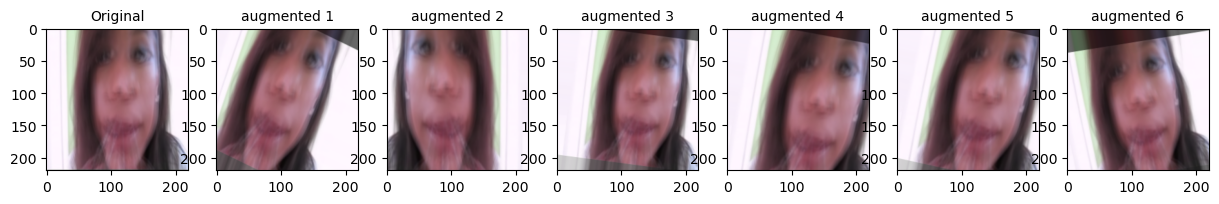

In [77]:
n = randint(0,len(X_train))
samples = np.expand_dims(X_train[n], 0)
it = train_datagen.flow(samples, batch_size=batch_size)
cols = 7

fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(15, 10))
ax[0].imshow(X_train[n], cmap='gray')
ax[0].set_title('Original', fontsize=10)

for i in range(1,cols):
    batch = it.next()    # generate batch of images 
    image = batch[0].astype('uint32') # convert to unsigned int for viewing
    ax[i].set_title('augmented {}'.format(i), fontsize=10)
    ax[i].imshow(image, cmap='gray')

Create two numpy array iterators `train_gen` and `val_gen` and fill them with additional images:

In [78]:
train_gen = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_gen = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [79]:
m = model.fit_generator(
       train_gen,
       steps_per_epoch= iter_per_epoch,
       epochs=EPOCHS, 
       validation_data = val_gen,
       validation_steps = val_per_epoch,
       verbose = 1 # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
       )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
25/25 [==============================] - 64s 2s/step - loss: 4.1884 - accuracy: 0.1686 - val_loss: 1.9460 - val_accuracy: 0.2865
Epoch 2/15
25/25 [==============================] - 62s 2s/step - loss: 1.8388 - accuracy: 0.3384 - val_loss: 1.5873 - val_accuracy: 0.4531
Epoch 3/15
25/25 [==============================] - 62s 2s/step - loss: 1.6663 - accuracy: 0.3962 - val_loss: 1.5566 - val_accuracy: 0.4583
Epoch 4/15
25/25 [==============================] - 62s 2s/step - loss: 1.4702 - accuracy: 0.4755 - val_loss: 1.1757 - val_accuracy: 0.5885
Epoch 5/15
25/25 [==============================] - 62s 2s/step - loss: 1.3237 - accuracy: 0.5509 - val_loss: 1.1698 - val_accuracy: 0.5781
Epoch 6/15
25/25 [==============================] - 62s 2s/step - loss: 1.2584 - accuracy: 0.5434 - val_loss: 1.1598 - val_accuracy: 0.5885
Epoch 7/15
25/25 [==============================] - 62s 2s/step - loss: 1.1824 - accuracy: 0.5560 - val_loss: 1.1508 - val_accuracy: 0.6042
Epoch 8/15
25/25 [==

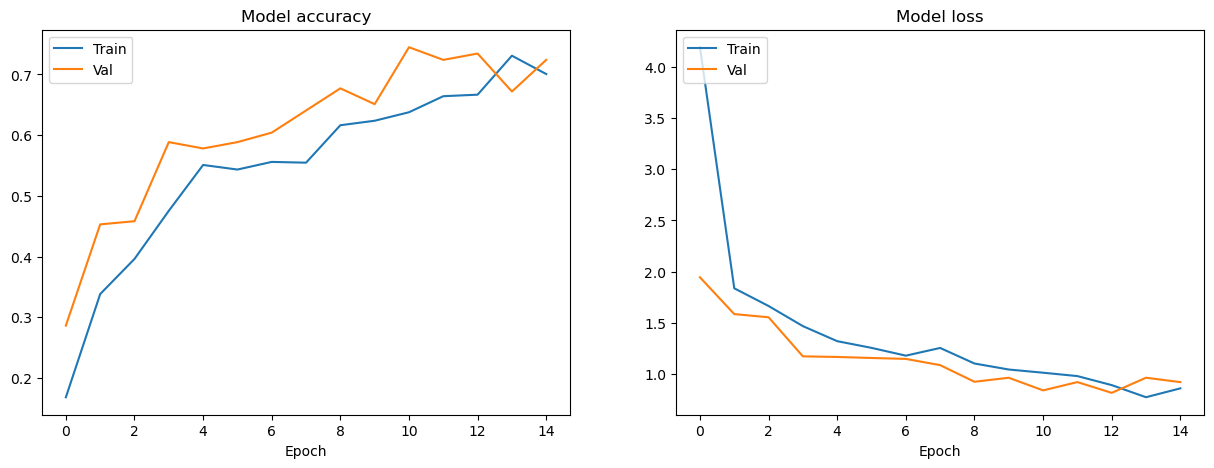

In [80]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(m.history['accuracy'])
axs[0].plot(m.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(m.history['loss'])
axs[1].plot(m.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

In [81]:
score = model.evaluate_generator(val_gen, steps= len(val_gen))

for idx, metric in enumerate(model.metrics_names):
    print('{}:{}'.format(metric, score[idx]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


loss:0.8956127762794495
accuracy:0.729468584060669


7/7 [==============================] - 4s 555ms/step


<AxesSubplot:>

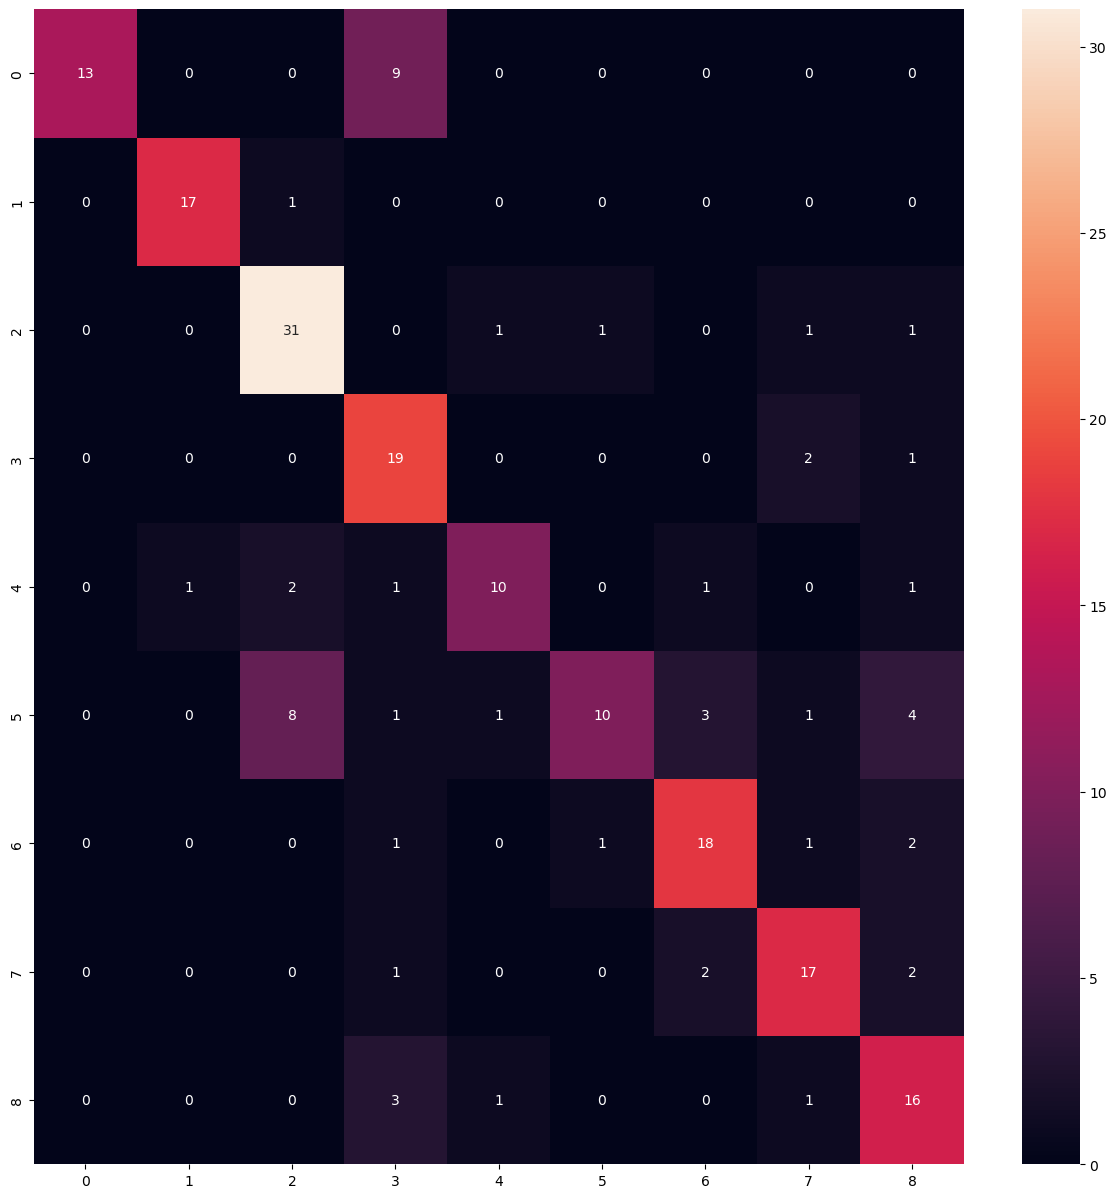

In [82]:
from sklearn.metrics import confusion_matrix
y_pre_test=model.predict(X_val)
y_pre_test=np.argmax(y_pre_test,axis=1)
cm=confusion_matrix(y_val,y_pre_test)

plt.figure(figsize = (15,15))
sn.heatmap(cm, annot=True)

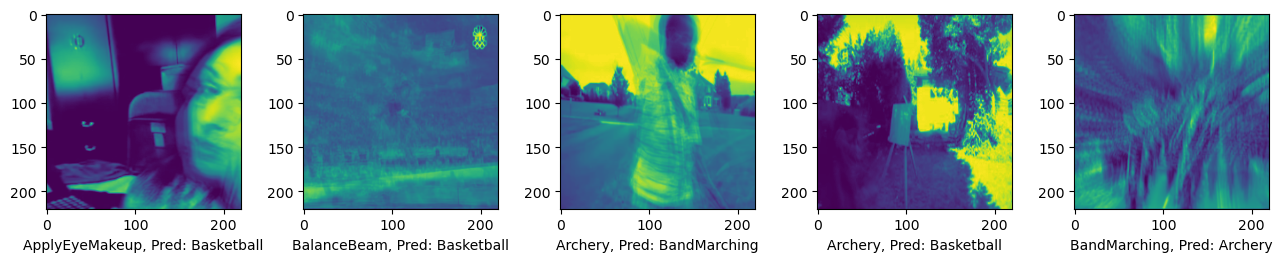

In [83]:
x=(y_pre_test-y_val!=0).tolist()
x=[i for i,l in enumerate(x) if l!=False]

fig,ax=plt.subplots(1,5,sharey=False,figsize=(13,13))
fig.tight_layout()

for i in range(5):
    ax[i].imshow(X_val[x[i]][:,:,1])
    ax[i].set_xlabel('{}, Pred: {}'.format(CLASSES[y_val[x[i]]],CLASSES[y_pre_test[x[i]]]))

In [84]:
model.save('activity_recognition.h5')

In [85]:
test_dir = '/kaggle/input/dynamicimages9/test/'

In [86]:
Test_Imgs, Test_Lbls = read_imgs_lbls(test_dir)
Test_Lbls = get_class_index(Test_Lbls)

In [89]:
print(Test_Lbls)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]


In [87]:
Test_Imgs = crop_images(Test_Imgs)
print('shape of images in test set: {} '.format(Test_Imgs.shape))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

shape of images in test set: (180, 220, 220, 3) 


In [90]:
print(Test_Imgs[0])

[[[253 250 254]
  [253 250 254]
  [253 250 254]
  ...
  [113 116  97]
  [ 92  95  74]
  [ 78  81  63]]

 [[253 250 254]
  [253 250 254]
  [252 250 254]
  ...
  [112 115  95]
  [ 90  93  73]
  [ 79  81  63]]

 [[253 250 254]
  [253 250 254]
  [252 250 254]
  ...
  [108 111  92]
  [ 87  89  71]
  [ 80  83  64]]

 ...

 [[ 32  73  90]
  [ 26  68  84]
  [ 37  78  94]
  ...
  [ 51  89 120]
  [ 35  54  68]
  [ 47  57  62]]

 [[ 29  72  89]
  [ 34  76  93]
  [ 54  96 113]
  ...
  [ 50  86 116]
  [ 44  63  74]
  [ 49  59  63]]

 [[ 16  59  81]
  [ 27  69  91]
  [ 55  97 118]
  ...
  [ 59  90 117]
  [ 58  77  84]
  [ 55  65  67]]]


In [92]:
predict_x=model.predict(Test_Imgs) 
classes_x=np.argmax(predict_x,axis=1)

6/6 [==============================] - 3s 554ms/step


In [100]:
print(len(classes_x))
print(classes_x)

180
[0 7 0 0 0 0 0 3 3 0 3 3 3 0 0 0 0 3 0 0 1 1 1 8 1 1 1 1 1 1 3 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 4 2 2 2 4 2 8 2 2 2 2 2 2 3 3 7 3 3 3 5 3 3 3 7 3 3 3
 8 3 3 3 3 3 4 4 4 4 4 7 4 4 4 4 4 7 4 4 4 4 7 2 4 4 5 5 7 2 5 6 8 5 5 8 5
 7 8 2 5 5 5 2 5 4 3 6 6 1 6 6 6 6 6 6 6 6 6 3 6 6 6 6 6 6 7 7 7 3 7 7 7 7
 7 7 6 7 7 7 7 7 7 7 3 8 8 8 8 8 8 0 2 7 8 1 8 6 7 8 4 8 0 6 8 8]


In [106]:
match = 0
for i in range(180):
    if classes_x[i] == Test_Lbls[i]:
        match=match+1
accuracy = (match/180)*100
print("Accuracy : ", accuracy)

Accuracy :  74.44444444444444


<AxesSubplot:>

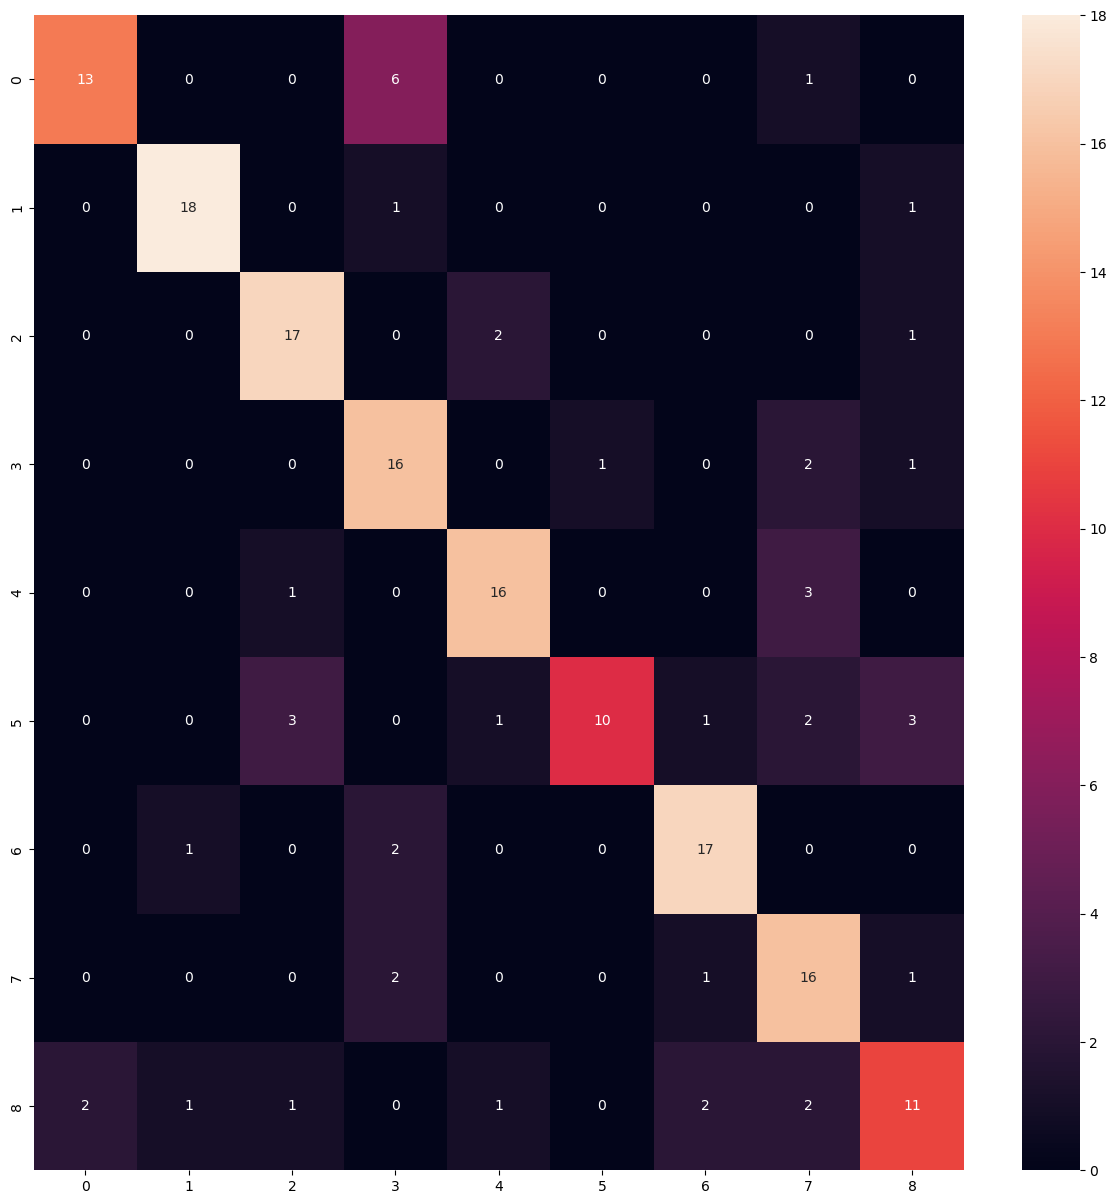

In [107]:
cm=confusion_matrix(Test_Lbls,classes_x)

plt.figure(figsize = (15,15))
sn.heatmap(cm, annot=True)